In [1]:
# So, let us dive right in. For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

In [2]:
from qiskit_metal import draw, Dict
from qiskit_metal.qlibrary.core import BaseQubit
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
from qiskit_metal.draw import LineString
from qiskit_metal.qlibrary.core.qroute import QRouteLead, QRoutePoint, QRoute
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from  qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
import  math
import numpy as np


In [16]:
class New_Transomon_Cross_01(BaseQubit):
    """
    Inherits 'QComponent' class.

    Description:
        A simple CPW style gap capacitor, with endcap islands each coupled to their own
        cpw transmission line that ends in a pin.

    Options:
        * cpw_width: width of the cpw trace of the transmission line
        * cpw_gap: dielectric gap of the cpw transmission line
        * cap_width: width of the gap capacitor (size of the charge islands)
        * cap_gap: dielectric space between the two islands
        * pos_x/_y: position of the capacitor on chip
        * orientation: 0-> is parallel to x-axis, with orientation (in degrees) counterclockwise.
        * layer: the layer number for the layout


    """

    # Edit these to define your own tempate options for creation
    # Default drawing options
    default_options = Dict(cross_width = '1340um',
                            cross_height = '80um',
                            cross_inside_width = '20um',
                            pad_width = '40um',
                            pad_height = '40um',
                            pad_distance = '20um',
                            jj_pad_width = '10um',
                            jj_pad_height = '9um',
                            jj_etch_length = '4um',
                            jj_etch_pad1_width = '4um',
                            jj_etch_pad2_width = '7um',
                           round_corner_radius = '10um',
                            chip = 'main',
                            pos_x='0um',
                            pos_y='0um',
                            orientation='0',
                            layer='1')
    """Default drawing options"""

    # Name prefix of component, if user doesn't provide name
    component_metadata = Dict(short_name='transmon_cc',
                             _qgeometry_table_poly='True',
                             _qgeometry_table_path='True',
                              _qgeometry_table_junction='True')
    """Component metadata"""

    #define fillet radius
    def  round_corner(self,radius,line):
        # line1 = line.buffer(1,cap_style=2)
        line1 = line.buffer(radius,join_style=1)
        line1 = line1.buffer(-2*radius, join_style=1)
        line1 = line1.buffer(radius,join_style=1)
        return  line1

    def make(self):
        """Convert self.options into QGeometry."""

        p = self.parse_options()  # Parse the string options into numbers

        # pad = draw.rectangle(p.cpw_width, p.cap_width, 0, 0)
        # pad_left = draw.translate(pad,-(p.cpw_width+p.cap_gap)/2,0)
        # pad_right = draw.translate(pad,(p.cpw_width+p.cap_gap)/2,0)
        # pad_etch = draw.rectangle(2*p.cpw_gap+2*p.cpw_width+p.cap_gap,2*p.cpw_gap+p.cap_width)
        # cpw_left = draw.shapely.geometry.LineString([[-(p.cpw_width+p.cap_gap/2),0],[-(p.cpw_width*3 +p.cap_gap/2),0]])
        # cpw_right = draw.shapely.geometry.LineString([[(p.cpw_width+p.cap_gap/2),0],[(p.cpw_width*3 +p.cap_gap/2),0]])
        #
        # geom_list = [pad_left,pad_right,cpw_left,cpw_right,pad_etch]
        # geom_list = draw.rotate(geom_list,p.orientation)
        # geom_list = draw.translate(geom_list,p.pos_x,p.pos_y)
        # [pad_left,pad_right,cpw_left,cpw_right,pad_etch] = geom_list
        cross_length = p.cross_width/2
        start_point = p.cross_width/2-p.pad_width/2-p.pad_distance
        mid_point = p.cross_height/2
        jj_pad_width = p.jj_pad_width
        jj_etch_length = p.jj_etch_length
        jj_etch_pad1_width = p.jj_etch_pad1_width
        jj_etch_pad2_width = p.jj_etch_pad2_width
        num_interpolation = 5
        point_space = (start_point-mid_point)/num_interpolation
        chip = p.chip
        radius = p.round_corner_radius
        #draw two islands

        first_point = start_point-point_space
        second_point = start_point-2*point_space
        third_point = start_point- 3*point_space
        fourth_point = start_point-4*point_space
        point0 = (-start_point,0)
        point1 = (-first_point,0)
        point2 = (-second_point,0)
        point3 = (-third_point,0)
        point4 = (-fourth_point,0)
        point5 = (-mid_point,0)
        point6 = (0,mid_point)
        point7 = (0,fourth_point)
        point8 = (0,third_point)
        point9 = (0,second_point)
        point10 = (0,first_point)
        point11 = (0,start_point)

        line = LineString([point0,point1,point2,point3,point4,point5,point6,point7,point8,point9,point10,point11])
        # line = LineString([point5,point6])
        line0 = line.buffer(p.cross_inside_width/2,cap_style=3,join_style=1)
        line0 = self.round_corner(radius*p.pad_width/p.cross_height,line0)
        # line1 = draw.rotate(line0, -180,origin=(0,0))
        length_island =draw.shapely.length(LineString([point5,point6]))
        #Joesphon Junction draw
        skew_line = LineString([point5,point6])
        island1_mid_point = draw.shapely.line_interpolate_point(skew_line,length_island/2)
        island2_mid_point = draw.shapely.transform(island1_mid_point,lambda x:-x)
        jj_pad1_end_coord = (-mid_point/2+( p.jj_pad_height+p.cross_inside_width/2)*math.sqrt(2.0)/2.0, mid_point/2- (p.jj_pad_height+p.cross_inside_width/2)*math.sqrt(2.0)/2.0)
        rect_jj_pad1_referenceLine = LineString([island1_mid_point,jj_pad1_end_coord])
        rect_jj_pad1_referenceLine_buffer = rect_jj_pad1_referenceLine.buffer(jj_pad_width,cap_style=2)
        # length_jj = draw.shapely.length(rect_jj)
        epsilon = 1e-4
        rect_jj_pad1_intersect_point1 = draw.shapely.line_interpolate_point(rect_jj_pad1_referenceLine,-jj_etch_length /2)
        rect_jj_pad1_intersect_point1_epsilon = draw.shapely.line_interpolate_point(rect_jj_pad1_referenceLine,-jj_etch_length/2+epsilon)
        rect_jj_pad1_intersect_point2 = draw.shapely.line_interpolate_point(rect_jj_pad1_referenceLine,-jj_etch_length)
        rect_jj_pad1_polygon1 = LineString([rect_jj_pad1_intersect_point1,jj_pad1_end_coord]).buffer(jj_etch_pad1_width/2,cap_style=2)
        rect_jj_pad1_polygon2 = LineString([rect_jj_pad1_intersect_point2,rect_jj_pad1_intersect_point1_epsilon]).buffer(jj_etch_pad2_width/2,cap_style=2)
        jj_pad = draw.unary_union([rect_jj_pad1_polygon1,rect_jj_pad1_polygon2])
        jj_pad_etch = draw.subtract(rect_jj_pad1_referenceLine_buffer,jj_pad)
        pad1 = draw.rectangle(p.pad_width, p.pad_height,start_point,0)
        pad1 = self.round_corner(radius*p.pad_width/p.cross_height,pad1)
        pad2 = draw.rectangle(p.pad_width, p.pad_height,0,start_point)
        pad2 = self.round_corner(radius*p.pad_width/p.cross_height,pad2)
        component_leg1 = draw.unary_union([line0,jj_pad_etch,pad1,pad2])
        component_leg2 =  draw.rotate(component_leg1, -180,origin=(0,0))
        # draw cross line outside
        cross_line = draw.unary_union([
                    draw.LineString([(0, cross_length), (0, -cross_length)]),
                    draw.LineString([(cross_length, 0), (-cross_length, 0)])
                ])
        cross_etch = cross_line.buffer(p.cross_height/ 2, cap_style=2)
        cross_etch = self.round_corner(radius,cross_etch)
        cross= draw.unary_union([component_leg1,component_leg2])
        rect_jj_pad1_intersect_point2_symmetry = draw.shapely.transform(rect_jj_pad1_intersect_point2,lambda x: -x)
        rect_jj =draw.LineString([rect_jj_pad1_intersect_point2, rect_jj_pad1_intersect_point2_symmetry])
        # etch_area = draw.subtract(cross,positive_area)
        polys = [cross, cross_etch, rect_jj]
        polys = draw.rotate(polys, p.orientation, origin=(0, 0))
        polys = draw.translate(polys, p.pos_x, p.pos_y)
        [cross, cross_etch, rect_jj] = polys
        connector_pin_right = draw.LineString([(p.cross_width/2,-p.cross_height/2),(p.cross_width/2,p.cross_height/2)])
        # add qgeometry
        self.add_qgeometry('poly', dict(cross=cross), chip=chip)
        self.add_qgeometry('poly',
                           dict(cross_etch=cross_etch),
                           subtract=True,
                           chip=chip)
        self.add_qgeometry('junction',
                           dict(rect_jj=rect_jj),
                           width=p.jj_pad_width,
                           chip=chip)
        # self.add_qgeometry('path', {'cpw_left':cpw_left, 'cpw_right':cpw_right}, layer=p.layer, width = p.cpw_width)
        # self.add_qgeometry('path', {'cpw_left_etch':cpw_left, 'cpw_right_etch':cpw_right}, layer=p.layer, width = p.cpw_width+2*p.cpw_gap, subtract=True)
        # self.add_qgeometry('poly', {'pad_left':pad_left, 'pad_right':pad_right}, layer=p.layer)
        # self.add_qgeometry('poly', {'pad_etch':pad_etch}, layer=p.layer, subtract=True)

        #add pins
        self.add_pin('pin_right', connector_pin_right.coords, width = p.cross_height)
        # self.add_pin('pin_right', cpw_right.coords, width = p.cpw_width, gap = p.cpw_gap, input_as_norm=True)

In [17]:
class MyReadoutRes01(QComponent):
    '''
    The base ReadoutResFC class

    Inherits the QComponent class

    Readout resonator for the flipchip dev. Written for the flipchip tutorial.

    The device consists of the following shapes combined together:
        - a circle centered at ('pos_x', 'pos_y') with a radius of 'readout_radius', followed by
        - a straight line (length= 'readout_l1') at a 45 degree angle, followed by
        - a 45 degree arc, followed by
        - a vertical line (length = 'readout_l2'), followed by
        - a 90 degree arc, followed by
        - a horizontal line (length = 'readout_l3'), followed by
        - a 180 degree arc, followed by
        - a horizontal line (length = 'readout_l4'), followed by
        - 5 meandering horizontal lines (length = 'readout_l5') separated 180 degree arcs.

    The arc has a bend radius of 'readout_cpw_turnradius',
        it is measured from the center of the cpw to the center of rotation.
    The lines and arcs will form a cpw with a signal linewidth of 'readout_cpw_width', and
        signal-to-ground separation of 'readout_cpw_gap'.

    One of the ways to adjust this design to your needs:
    - change the coupling to the qubit by varying the 'readout_radius',
    - couple the resonator to the feedthrough transmission line via
        the horizontal section with this length 'readout_l3',
    - adjust the frequency of the resonator by varying 'readout_l5'.

    '''

    default_options = Dict(pos_x='0 um',
                           pos_y='0 um',
                           readout_radius='50 um',
                           readout_cpw_width='5 um',
                           readout_cpw_gap='5 um',
                           readout_cpw_turnradius='50 um',
                           vertical_start_length = '40 um',
                           vertical_end_length = '200 um',
                           horizontal_start_length01= '400 um',
                           horizontal_start_length02 = '400 um',
                           horizontal_end_length = '500 um',
                           total_length = '4000 um',
                           arc_step='1 um',
                           meander_round = '5',
                           orientation='0',
                           layer='1',
                           layer_subtract='2',
                           inverse = False,
                           mirror = False,
                           subtract=True,
                           chip='main',
                           _default_connection_pads=Dict())
    ''' Default drawing options ?? '''
    component_metadata = Dict(short_name='myreadoutres01',
                              _qgeometry_table_poly='True',
                              _qgeometry_table_junction='False')
    ''' Component metadata '''

    ##########################
    def make(self):
        ''' Make the head for readout res'''
        self.make_ro()

    ##########################

    def make_ro(self):
        '''
        Create the head of the readout resonator.
        Contains: the circular patch for coupling,
            the 45 deg line,
            the 45 deg arc,
            a short straight segment (of length w) for smooth subtraction
        '''
        # access to parsed values from the user option
        p = self.p

        # access to chip name
        chip = p.chip

        # local variables
        r = p.readout_radius
        w = p.readout_cpw_width
        g = p.readout_cpw_gap
        turnradius = p.readout_cpw_turnradius
        N = p.meander_round
        l_1 = 0
        l_2 = p.vertical_start_length
        l_3 =  p. horizontal_start_length01
        l_4 = p.horizontal_start_length02

        total_length = p.total_length
        left_length = l_2+ p. vertical_end_length \
                       + l_3 + l_4 + p.horizontal_end_length + (N+2.5)*np.pi *turnradius
        if (total_length<=left_length):
            l_5 = 0
        l_5 =(total_length- left_length) / N
        l_6 = p.vertical_end_length
        l_7 = p.horizontal_end_length


        # create the coupling patch in term of a circle
        cppatch = draw.Point(0, 0).buffer(r)

        # create the extended arm
        ## useful coordinates
        eps0 = 1e-2
        x_3, y_3 = 0, r-eps0
        x_4, y_4 = x_3, y_3 +l_2+eps0
        x_5, y_5 = x_4 + turnradius, y_4
        # coord_x2 = draw.Point(x_2,y_2)
        coord_init1 = draw.Point(x_4, y_4)
        coord_center1 = draw.Point(x_5, y_5)
        x_6, y_6 = x_5, y_5 +turnradius
        x_7, y_7 = x_5 + l_3, y_6
        x_8, y_8 = x_7, y_7 + turnradius
        coord_x6 = draw.Point(x_6,y_6)
        coord_init2 = draw.Point((x_7, y_7))
        coord_center2 = draw.Point((x_8, y_8))
        x_9, y_9 = x_8, y_8 + turnradius
        x_10, y_10 = x_8 - l_4, y_9
        x_11, y_11 = x_10, y_10 + turnradius
        coord_x9 = draw.Point((x_9,y_9))
        coord_init3 = draw.Point((x_10, y_10))
        coord_center3 = draw.Point((x_11, y_11))
        arc3 = self.arc(coord_init3, coord_center3, -np.pi)
        x_12, y_12 = x_11, y_11 + turnradius
        x_13, y_13 = x_12 + l_5, y_12
        line12 = draw.LineString([(x_12, y_12), (x_13, y_13)])
        x_14, y_14 = x_13, y_13 + turnradius
        coord_x12 = draw.Point(x_12,y_12)
        coord_init4 = draw.Point((x_13, y_13))
        coord_center4 = draw.Point((x_14, y_14))
        arc4 = self.arc(coord_init4, coord_center4, np.pi)
        # x_15,y_15 = x_13, y_13+4*2*turnradius
        # x_16,y_16 = x_15,y_15 + turnradius
        # x_17,y_17 = x_16+turnradius, y_16
        # coord_init5 = draw.Point(x_15,y_15)
        # coord_center5 = draw.Point(x_16,y_16)
        geometry_list=[]
        round_num = math.ceil((N-1)/2)+1
        for i in range(int(N-2)):
            geometry_list.append(draw.translate(line12,0,(i+1)*2*turnradius))
            if  (i%2==0):
               geometry_list.append(draw.translate(arc3,0,(i+2)*2*turnradius))
            else:
                 geometry_list.append(draw.translate(arc4,0,(i+1)*2*turnradius))

        geometry_list.append(draw.translate(line12,0,(N-1)*2*turnradius))
        if  ((N-1)%2==0):
            x_15,y_15 = x_13, y_13+(N-1)*2*turnradius
            x_16,y_16 = x_15,y_15 + turnradius
            x_17,y_17 = x_16+turnradius, y_16
            coord_init5 = draw.Point(x_15,y_15)
            coord_center5 = draw.Point(x_16,y_16)
            geometry_list.append(self.arc(coord_init5,coord_center5,np.pi/2))
        else:
            x_15,y_15 = x_12,y_12 +(N-1)*2*turnradius
            x_16,y_16 = x_15,y_15 + turnradius
            x_17,y_17 = x_16-turnradius, y_16
            coord_init5 = draw.Point(x_15,y_15)
            coord_center5 = draw.Point(x_16,y_16)
            geometry_list.append(self.arc(coord_init5,coord_center5,-np.pi/2))

        x_18, y_18 = x_17 , y_17 + l_6
        x_19,y_19 = x_18+turnradius,y_18
        coord_init6 =draw.Point((x_18,y_18))
        coord_center6 = draw.Point((x_19,y_19))
        x_20, y_20 = x_19 , y_19+turnradius
        x_21,y_21 = x_20+l_7,y_20

        geometry_list0 = [
            # draw.LineString([(0, 0), coord_init]),
            # arc(coord_init, coord_center, -np.pi / 4),
            draw.LineString([(x_3, y_3), (x_4, y_4)]),
            self.arc(coord_init1, coord_center1, -np.pi / 2),
            draw.LineString([(x_6, y_6), (x_7, y_7)]),
            self.arc(coord_init2, coord_center2, np.pi),
            draw.LineString([(x_9, y_9), (x_10, y_10)]), arc3, line12, arc4,
            # draw.translate(line12, 0, 2 * turnradius),
            # draw.translate(arc3, 0, 4 * turnradius),
            # draw.translate(line12, 0, 4 * turnradius),
            # draw.translate(arc4, 0, 4 * turnradius),
            # draw.translate(line12, 0, 6 * turnradius),
            # draw.translate(arc3, 0, 8 * turnradius),
            # draw.translate(line12, 0, 8 * turnradius),
            # arc(coord_init5,coord_center5,np.pi/2),
            draw.LineString([(x_17,y_17),(x_18,y_18)]),
            self.arc(coord_init6, coord_center6, -np.pi/2),
            draw.LineString([(x_20,y_20),(x_21,y_21)])
        ]
        full_shape = geometry_list+geometry_list0
        cparm_line = draw.unary_union(full_shape)
        cparm = cparm_line.buffer(w / 2, cap_style=2, join_style=1)


        ## fix the gap resulting from buffer
        eps = 1e-3
        cparm = draw.Polygon(cparm.exterior)
        cparm = cparm.buffer(eps, join_style=2).buffer(-eps, join_style=2)

        # create combined objects for the signal line and the etch
        ro = draw.unary_union([cppatch, cparm])
        ro_etch = ro.buffer(g, cap_style=2, join_style=2)
        # x_15, y_15 = x_14, y_14 + 7 * turnradius
        x_22, y_22 = x_21 + g / 2, y_21
        port_line = draw.LineString([(x_21, y_21 + w / 2),
                                     (x_21, y_21 - w / 2)])
        subtract_patch = draw.LineString([(x_22, y_22 - w / 2 - g - eps),
                                          (x_22, y_22 + w / 2 + g + eps)
                                         ]).buffer(g / 2, cap_style=2)
        ro_etch = ro_etch.difference(subtract_patch)

        #inverse and mirror
        [ro, ro_etch, port_line] = draw.shapely.transform( [ro, ro_etch, port_line],lambda x: -x)
        if (p.inverse==True):
             [ro, ro_etch, port_line] = draw.shapely.transform( [ro, ro_etch, port_line],lambda x: -x)
        if  (p.mirror==True):
             [ro, ro_etch, port_line]= draw.shapely.transform( [ro, ro_etch, port_line],lambda x: x*[-1,1])
        # rotate and translate
        polys = [ro, ro_etch, port_line]
        polys = draw.rotate(polys, p.orientation, origin=(0, 0))
        polys = draw.translate(polys, p.pos_x, p.pos_y)


        # update each object
        [ro, ro_etch, port_line] = polys

        # generate QGeometry
        self.add_qgeometry('poly', dict(ro=ro), chip=chip, layer=p.layer)
        self.add_qgeometry('poly',
                           dict(ro_etch=ro_etch),
                           chip=chip,
                           layer=p.layer_subtract,
                           subtract=p.subtract)

        # generate pins
        self.add_pin('readout', port_line.coords, width=w, gap=g, chip=chip)

    def arc(self, coord_init, coord_center, angle):
        '''
        Generate x,y coordinates (in terms of shapely.geometry.Point()) of an arc with:
        a specified initial point, rotation center, and
        rotation direction (specified by angle in radian (float or integer), positive is ccw).

        coord_init, and coord_center should be shapely.geometry.Point object
        '''
        # access to parse values from the user option
        p = self.p

        # local variable
        r = p.readout_cpw_turnradius
        step = p.arc_step

        # determine step number
        step_angle = step / r if angle >= 0 else -step / r
        step_N = abs(int(angle / step_angle))
        #laststep_flag = True if angle % step_angle != 0 else False
        laststep_flag = bool(angle % step_angle != 0)

        # generate coordinate
        coord = [coord_init]
        point = coord_init
        for i in range(step_N):
            point = draw.rotate(point,
                                step_angle,
                                origin=coord_center,
                                use_radians=True)
            coord.append(point)
        if laststep_flag:
            point = draw.rotate(coord_init,
                                angle,
                                origin=coord_center,
                                use_radians=True)
            coord.append(point)
        coord = draw.LineString(coord)
        return coord


In [18]:
class MyReadoutRes02(QComponent):
    '''
    The base ReadoutResFC class

    Inherits the QComponent class

    Readout resonator with polygon coupling for the flipchip dev.

    '''

    default_options = Dict(pos_x='0 um',
                           pos_y='0 um',
                           readout_coupling_width='80 um',
                           readout_coupling_height = '150 um',
                           readout_cpw_width='5 um',
                           readout_cpw_gap='5 um',
                           readout_cpw_turnradius='50 um',
                           vertical_start_length = '40 um',
                           vertical_end_length = '200 um',
                           horizontal_start_length01= '400 um',
                           horizontal_start_length02 = '400 um',
                           horizontal_end_length = '500 um',
                           total_length = '4000 um',
                           arc_step='1 um',
                           meander_round = '5',
                           orientation='0',
                           fillet = '5 um',
                           layer='1',
                           layer_subtract='2',
                           horizontal_end_direction = 'right',
                           inverse = False,
                           mirror = False,
                           subtract=True,
                           chip='main',
                           _default_connection_pads=Dict())
    ''' Default drawing options ?? '''
    component_metadata = Dict(short_name='myreadoutres02',
                              _qgeometry_table_poly='True',
                              _qgeometry_table_junction='False')
    ''' Component metadata '''

    ##########################
    def make(self):
        ''' Make the head for readout res'''
        self.make_ro()

    ##########################
    def  round_corner_rectangle(self, radius,rect):
        rect1 = rect.buffer(radius, join_style=1)
        rect1 = rect1.buffer(-2*radius, join_style=1)
        rect1 = rect1.buffer(radius, join_style=1)
        return rect1

    def make_ro(self):
        '''
        Create the head of the readout resonator.
        Contains: the circular patch for coupling,
            the 45 deg line,
            the 45 deg arc,
            a short straight segment (of length w) for smooth subtraction
        '''
        # access to parsed values from the user option
        p = self.p

        # access to chip name
        chip = p.chip

        # local variables
        poly_h = p.readout_coupling_height
        poly_w = p.readout_coupling_width
        w = p.readout_cpw_width
        g = p.readout_cpw_gap
        turnradius = p.readout_cpw_turnradius
        N = p.meander_round
        l_1 = 0
        l_2 = p.vertical_start_length
        l_3 =  p. horizontal_start_length01
        l_4 = p.horizontal_start_length02

        total_length = p.total_length
        left_length = l_2+ p. vertical_end_length \
                       + l_3 + l_4 + p.horizontal_end_length + (N+2.5)*np.pi *turnradius
        if (total_length<=left_length):
            l_5 = 0
        l_5 =(total_length- left_length) / N
        l_6 = p.vertical_end_length
        l_7 = p.horizontal_end_length
        h_direction = p.horizontal_end_direction
        fillet = p.fillet
        eps0 = 1e-2

        # create the coupling patch in term of a circle
        cppatch = draw.rectangle(w=poly_w,h=poly_h,xoff=0,yoff=0)
        cppatch = self.round_corner_rectangle(fillet,cppatch)
        line_joint = draw.LineString([(0,poly_h/2),(0,poly_h/2+2.5*eps0)]).buffer(w/2,cap_style=3)
        cppatch = draw.unary_union([cppatch,line_joint])
        cppatch = self.round_corner_rectangle(0.2*eps0,cppatch)

        # create the extended arm
        ## useful coordinates

        x_3, y_3 = 0, poly_h/2+2.5*eps0
        x_4, y_4 = x_3, y_3 +l_2-2.5*eps0
        x_5, y_5 = x_4 + turnradius, y_4
        # coord_x2 = draw.Point(x_2,y_2)
        coord_init1 = draw.Point(x_4, y_4)
        coord_center1 = draw.Point(x_5, y_5)
        x_6, y_6 = x_5, y_5 +turnradius
        x_7, y_7 = x_5 + l_3, y_6
        x_8, y_8 = x_7, y_7 + turnradius
        coord_x6 = draw.Point(x_6,y_6)
        coord_init2 = draw.Point((x_7, y_7))
        coord_center2 = draw.Point((x_8, y_8))
        x_9, y_9 = x_8, y_8 + turnradius
        x_10, y_10 = x_8 - l_4, y_9
        x_11, y_11 = x_10, y_10 + turnradius
        coord_x9 = draw.Point((x_9,y_9))
        coord_init3 = draw.Point((x_10, y_10))
        coord_center3 = draw.Point((x_11, y_11))
        arc3 = self.arc(coord_init3, coord_center3, -np.pi)
        x_12, y_12 = x_11, y_11 + turnradius
        x_13, y_13 = x_12 + l_5, y_12
        line12 = draw.LineString([(x_12, y_12), (x_13, y_13)])
        x_14, y_14 = x_13, y_13 + turnradius
        coord_x12 = draw.Point(x_12,y_12)
        coord_init4 = draw.Point((x_13, y_13))
        coord_center4 = draw.Point((x_14, y_14))
        arc4 = self.arc(coord_init4, coord_center4, np.pi)
        # x_15,y_15 = x_13, y_13+4*2*turnradius
        # x_16,y_16 = x_15,y_15 + turnradius
        # x_17,y_17 = x_16+turnradius, y_16
        # coord_init5 = draw.Point(x_15,y_15)
        # coord_center5 = draw.Point(x_16,y_16)
        geometry_list=[]
        round_num = math.ceil((N-1)/2)+1
        for i in range(int(N-2)):
            geometry_list.append(draw.translate(line12,0,(i+1)*2*turnradius))
            if  (i%2==0):
               geometry_list.append(draw.translate(arc3,0,(i+2)*2*turnradius))
            else:
                 geometry_list.append(draw.translate(arc4,0,(i+1)*2*turnradius))

        geometry_list.append(draw.translate(line12,0,(N-1)*2*turnradius))
        if  ((N-1)%2==0):
            x_15,y_15 = x_13, y_13+(N-1)*2*turnradius
            x_16,y_16 = x_15,y_15 + turnradius
            x_17,y_17 = x_16+turnradius, y_16
            coord_init5 = draw.Point(x_15,y_15)
            coord_center5 = draw.Point(x_16,y_16)
            geometry_list.append(self.arc(coord_init5,coord_center5,np.pi/2))
        else:
            x_15,y_15 = x_12,y_12 +(N-1)*2*turnradius
            x_16,y_16 = x_15,y_15 + turnradius
            x_17,y_17 = x_16-turnradius, y_16
            coord_init5 = draw.Point(x_15,y_15)
            coord_center5 = draw.Point(x_16,y_16)
            geometry_list.append(self.arc(coord_init5,coord_center5,-np.pi/2))

        x_18, y_18 = x_17 , y_17 + l_6

        if  (h_direction=='left'):
            x_19,y_19 = x_18-turnradius,y_18
            x_20, y_20 = x_19 , y_19+turnradius
            x_21,y_21 = x_20-l_7,y_20
            angle_arc = np.pi/2
        else:
            x_19,y_19 = x_18+turnradius,y_18
            x_20, y_20 = x_19 , y_19+turnradius
            x_21,y_21 = x_20+l_7,y_20
            angle_arc = -np.pi/2
        coord_init6 =draw.Point((x_18,y_18))
        coord_center6 = draw.Point((x_19,y_19))
        geometry_list0 = [
            # draw.LineString([(0, 0), coord_init]),
            # arc(coord_init, coord_center, -np.pi / 4),
            draw.LineString([(x_3, y_3), (x_4, y_4)]),
            self.arc(coord_init1, coord_center1, -np.pi / 2),
            draw.LineString([(x_6, y_6), (x_7, y_7)]),
            self.arc(coord_init2, coord_center2, np.pi),
            draw.LineString([(x_9, y_9), (x_10, y_10)]), arc3, line12, arc4,
            # draw.translate(line12, 0, 2 * turnradius),
            # draw.translate(arc3, 0, 4 * turnradius),
            # draw.translate(line12, 0, 4 * turnradius),
            # draw.translate(arc4, 0, 4 * turnradius),
            # draw.translate(line12, 0, 6 * turnradius),
            # draw.translate(arc3, 0, 8 * turnradius),
            # draw.translate(line12, 0, 8 * turnradius),
            # arc(coord_init5,coord_center5,np.pi/2),
            draw.LineString([(x_17,y_17),(x_18,y_18)]),
            self.arc(coord_init6, coord_center6, angle_arc),
            draw.LineString([(x_20,y_20),(x_21,y_21)])
        ]
        full_shape = geometry_list+geometry_list0
        cparm_line = draw.unary_union(full_shape)
        cparm = cparm_line.buffer(w / 2, cap_style=2, join_style=1)


        ## fix the gap resulting from buffer
        eps = 1e-3
        cparm = draw.Polygon(cparm.exterior)
        cparm = cparm.buffer(eps, join_style=2).buffer(-eps, join_style=2)

        # create combined objects for the signal line and the etch
        ro = draw.unary_union([cppatch, cparm])
        ro_etch = ro.buffer(g, cap_style=2, join_style=1)
        ro_etch = self.round_corner_rectangle(eps,ro_etch)
        # x_15, y_15 = x_14, y_14 + 7 * turnradius
        x_22, y_22 = x_21 + g / 2, y_21
        port_line = draw.LineString([(x_21, y_21 + w / 2),
                                     (x_21, y_21 - w / 2)])
        subtract_patch = draw.LineString([(x_22, y_22 - w / 2 - g - eps),
                                          (x_22, y_22 + w / 2 + g + eps)
                                         ]).buffer(g / 2, cap_style=2)
        ro_etch = ro_etch.difference(subtract_patch)

        #inverse and mirror
        [ro, ro_etch, port_line] = draw.shapely.transform( [ro, ro_etch, port_line],lambda x: -x)
        if (p.inverse==True):
             [ro, ro_etch, port_line] = draw.shapely.transform( [ro, ro_etch, port_line],lambda x: -x)
        if  (p.mirror==True):
             [ro, ro_etch, port_line]= draw.shapely.transform( [ro, ro_etch, port_line],lambda x: x*[-1,1])
        # rotate and translate
        polys = [ro, ro_etch, port_line]
        polys = draw.rotate(polys, p.orientation, origin=(0, 0))
        polys = draw.translate(polys, p.pos_x, p.pos_y)


        # update each object
        [ro, ro_etch, port_line] = polys

        # generate QGeometry
        self.add_qgeometry('poly', dict(ro=ro), chip=chip, layer=p.layer)
        self.add_qgeometry('poly',
                           dict(ro_etch=ro_etch),
                           chip=chip,
                           layer=p.layer_subtract,
                           subtract=p.subtract)

        # generate pins
        self.add_pin('readout', port_line.coords, width=w, gap=g, chip=chip)

    def arc(self, coord_init, coord_center, angle):
        '''
        Generate x,y coordinates (in terms of shapely.geometry.Point()) of an arc with:
        a specified initial point, rotation center, and
        rotation direction (specified by angle in radian (float or integer), positive is ccw).

        coord_init, and coord_center should be shapely.geometry.Point object
        '''
        # access to parse values from the user option
        p = self.p

        # local variable
        r = p.readout_cpw_turnradius
        step = p.arc_step

        # determine step number
        step_angle = step / r if angle >= 0 else -step / r
        step_N = abs(int(angle / step_angle))
        #laststep_flag = True if angle % step_angle != 0 else False
        laststep_flag = bool(angle % step_angle != 0)

        # generate coordinate
        coord = [coord_init]
        point = coord_init
        for i in range(step_N):
            point = draw.rotate(point,
                                step_angle,
                                origin=coord_center,
                                use_radians=True)
            coord.append(point)
        if laststep_flag:
            point = draw.rotate(coord_init,
                                angle,
                                origin=coord_center,
                                use_radians=True)
            coord.append(point)
        coord = draw.LineString(coord)
        return coord

In [19]:
class MyFluxLine01(QComponent):
    """
   The flip chip flux line class

   Inherits the QComponent class

   flux line for the flip chip dev. Written for the flip chip tutorial.

   """
    default_options = Dict(pos_x='0 um',
                           pos_y='0 um',
                           l_1='8.5 um',
                           l_2='12 um',
                           l_3 = '28 um',
                           l_4 = '28 um',
                           l_5 = '50 um',
                           flux_cpw_width='5 um',
                           flux_cpw_gap='2.5 um',
                           # readout_cpw_turnradius='50 um',
                           # vertical_start_length = '40 um',
                           # vertical_end_length = '200 um',
                           # horizontal_start_length01= '400 um',
                           # horizontal_start_length02 = '400 um',
                           # horizontal_end_length = '500 um',
                           # total_length = '4000 um',
                           # arc_step='1 um',
                           # meander_round = '5',
                           orientation='0',
                           layer='1',
                           layer_subtract='2',
                           inverse = False,
                           mirror = False,
                           subtract=True,
                           chip='main',
                           _default_connection_pads=Dict())
    ''' Default drawing options ?? '''
    component_metadata = Dict(short_name='myfluxline01',
                              _qgeometry_table_poly='True',
                              _qgeometry_table_junction='False')
    ''' Component metadata '''

    def  round_corner(self,radius,line):
        # line1 = line.buffer(1,cap_style=2)
        line1 = line.buffer(radius,join_style=1)
        line1 = line1.buffer(-2*radius, join_style=1)
        line1 = line1.buffer(radius,join_style=1)
        return  line1

    def make(self):
        p = self.p

        w = p.flux_cpw_width
        g = p.flux_cpw_gap
        inverse = p.inverse
        mirror = p.mirror
        orientation = p.orientation
        pos_x = p.pos_x
        pos_y = p.pos_y
        pin = Dict(middle=np.array([w/2,-(p.l_3/2+p.l_1)]), normal=np.array([0,1]))
        pts_list = []
        z_line = QRouteLead()
        z_line.seed_from_pin(pin=pin)
        pts_list.append(np.array([w/2,-(p.l_3/2+p.l_1)]))
        z_line.go_straight(p.l_1)
        pts_list.append(z_line.get_tip().position)

        z_line.go_right(p.l_2)
        pts_list.append(z_line.get_tip().position)

        z_line.go_left(p.l_3)
        pts_list.append(z_line.get_tip().position)

        z_line.go_left(p.l_4)
        pts_list.append(z_line.get_tip().position)

        z_line.go_left(p.l_5)
        pts_list.append(z_line.get_tip().position)

        line = draw.LineString(pts_list)
        line = line.buffer(w/2, cap_style=2, join_style=1)

        eps = 1e-3
        # line = draw.Polygon(line.exterior)
        # line = line.buffer(eps, join_style=2).buffer(-eps, join_style=2)
        line = self.round_corner(eps,line)

        #revise the end for flat
        pts_end = pts_list[-1]+[0, w/2]
        revise_line_e = draw.LineString([pts_list[-1],pts_end])
        revise_polygon_e = revise_line_e.buffer(w/2,cap_style=2)
        pts_start = pts_list[0]+[0,p.l_1/2]
        revise_line_s = draw.LineString([pts_list[0],pts_start])
        revise_polygon_s = revise_line_s.buffer(w/2,cap_style=2)
        line = draw.unary_union([line,revise_polygon_s,revise_polygon_e])

        pts_pin0 = pts_list[-1]-[w/2,0]
        pts_pin1 = pts_list[-1]+[w/2,0]
        pin_line = draw.LineString([pts_pin1,pts_pin0])
        line_etch = line.buffer(g, cap_style=2, join_style=2)
        line_etch = self.round_corner(eps,line_etch)

       # cut the remaining etch for beginning and end
        x_s, y_s = np.array([w/2,-(p.l_3/2+p.l_1)])-[0, g/2]
        subtract_patch_s = draw.LineString([(x_s- w / 2 - g - eps, y_s ),
                                              (x_s+ w / 2 + g + eps, y_s )
                                             ]).buffer(g / 2, cap_style=2)
        line_etch = line_etch.difference(subtract_patch_s)

        x_e, y_e = pts_list[-1]-[0, g/2]
        subtract_patch_e = draw.LineString([(x_e- w / 2 - g - eps, y_e ),
                                              (x_e+ w / 2 + g + eps, y_e )
                                             ]).buffer(g / 2, cap_style=2)
        line_etch = line_etch.difference(subtract_patch_e)
        line_etch = line_etch.difference(subtract_patch_s)


        if (inverse==True):
             [line, line_etch, pin_line] = draw.shapely.transform( [line, line_etch, pin_line],lambda x: -x)
        if  (mirror==True):
             [line, line_etch, pin_line]= draw.shapely.transform( [line, line_etch, pin_line],lambda x: x*[-1,1])
             pin_line = draw.LineString([pin_line.coords[1], pin_line.coords[0]])


        # rotate and translate
        polys = [line, line_etch, pin_line]
        polys = draw.rotate(polys, orientation, origin=(0, 0))
        polys = draw.translate(polys, pos_x, pos_y)


        # update each object
        [line, line_etch, pin_line] = polys

        # generate QGeometry
        self.add_qgeometry('poly', dict(line=line), chip=p.chip)
        self.add_qgeometry('poly',
                           dict(line_etch=line_etch),
                           chip=p.chip,
                           subtract=p.subtract)

        # generate pins
        self.add_pin('flux_pin', pin_line.coords, width=w, gap=g, chip=p.chip)




In [17]:
class MyFluxLine02(QComponent):
    """
   The flip chip flux line class

   Inherits the QComponent class

   flux line for the flip chip dev. Written for the flip chip tutorial.

   """
    default_options = Dict(pos_x='0 um',
                           pos_y='0 um',
                           l_1='8.5 um',
                           l_2='12 um',
                           l_3 = '28 um',
                           l_4 = '28 um',
                           l_5 = '50 um',
                           flux_cpw_width='5 um',
                           flux_cpw_gap='3 um',
                           flux_cpw_width0='10 um',
                           flux_cpw_gap0='6 um',
                           end_yposition = '330 um',
                           end_horizontal_length = '20 um',
                           c_length = '15 um',
                           angle = '45',
                           fillet = '10 um',
                           # vertical_start_length = '40 um',
                           # vertical_end_length = '200 um',
                           # horizontal_start_length01= '400 um',
                           # horizontal_start_length02 = '400 um',
                           # horizontal_end_length = '500 um',
                           # total_length = '4000 um',
                           # arc_step='1 um',
                           # meander_round = '5',
                           orientation='0',
                           layer='1',
                           layer_subtract='1',
                           inverse = False,
                           mirror = False,
                           subtract=True,
                           chip='main',
                           _default_connection_pads=Dict())
    ''' Default drawing options ?? '''
    component_metadata = Dict(short_name='myfluxline01',
                              _qgeometry_table_poly='True',
                              _qgeometry_table_junction='False')
    ''' Component metadata '''

    def  round_corner(self,radius,line):
        # line1 = line.buffer(1,cap_style=2)
        line1 = line.buffer(radius,join_style=1)
        line1 = line1.buffer(-2*radius, join_style=1)
        line1 = line1.buffer(radius,join_style=1)
        return  line1

    def  vector_rotation(self,vec,angle):
        theta = np.deg2rad(angle)
        rot = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
        return np.dot(rot,vec)


    def arc(self, coord_init, coord_center, angle):
        '''
        Generate x,y coordinates (in terms of shapely.geometry.Point()) of an arc with:
        a specified initial point, rotation center, and
        rotation direction (specified by angle in radian (float or integer), positive is ccw).

        coord_init, and coord_center should be shapely.geometry.Point object
        '''
        # access to parse values from the user option
        p = self.p

        # local variable
        r = p.fillet
        step = 1e-4
        angle = np.pi*angle/180
        coord_center=draw.Point(coord_center)

        # determine step number
        step_angle = step / r if angle >= 0 else -step / r
        step_N = abs(int(angle / step_angle))
        #laststep_flag = True if angle % step_angle != 0 else False
        laststep_flag = bool(angle % step_angle != 0)

        # generate coordinate
        coord = []
        point = draw.Point(coord_init)
        for i in range(step_N):
            point = draw.rotate(point,
                                step_angle,
                                origin=coord_center,
                                use_radians=True)

            coord.append(np.array(point.coords[0]))
        if laststep_flag:
            point = draw.rotate(draw.Point(coord_init),
                                angle,
                                origin=coord_center,
                                use_radians=True)
            coord.append(np.array(point.coords[0]))
        return coord


    def make(self):
        p = self.p

        w = p.flux_cpw_width
        g = p.flux_cpw_gap
        w0 = p.flux_cpw_width0
        g0 = p.flux_cpw_gap0
        inverse = p.inverse
        mirror = p.mirror
        orientation = p.orientation
        pos_x = p.pos_x
        pos_y = p.pos_y
        y_position = p.end_yposition
        c_length = p.c_length
        angle = p.angle
        length1 = (p.l_3/2-p.l_5-c_length*math.cos(angle*math.pi/180)+y_position)/(2*math.cos(angle*math.pi/180))
        length2 = length1
        length3 = p.end_horizontal_length


        pin = Dict(middle=np.array([w/2,-(p.l_3/2+p.l_1)]), normal=np.array([0,1]))
        pts_list = []
        z_line = QRouteLead()
        z_line.seed_from_pin(pin=pin)
        pts_list.append(np.array([w/2,-(p.l_3/2+p.l_1)]))
        z_line.go_straight(p.l_1)
        pts_list.append(z_line.get_tip().position)

        z_line.go_right(p.l_2)
        pts_list.append(z_line.get_tip().position)

        z_line.go_left(p.l_3)
        pts_list.append(z_line.get_tip().position)

        z_line.go_left(p.l_4)
        pts_list.append(z_line.get_tip().position)

        length_c1 = p.l_5-p.fillet*(1-math.cos(math.radians(angle)))/math.sin(math.radians(angle))
        z_line.go_left(length_c1)
        pts_list.append(z_line.get_tip().position)

        center = z_line.get_tip().position+self.vector_rotation(z_line.get_tip().direction,90)*p.fillet

        arc_list =self.arc(z_line.get_tip().position,center, angle)
        pts_list = pts_list+arc_list
        pin1 = Dict(middle=pts_list[-1], normal=self.vector_rotation(z_line.get_tip().direction,angle))
        z_line.seed_from_pin(pin=pin1)
        length_c2 = length1-p.fillet*(1-math.cos(math.radians(angle)))/math.sin(math.radians(angle))
        z_line.go_straight(length_c2)

        # z_line.go_angle(length1,angle)
        pts_list.append(z_line.get_tip().position)

        #determine four points for connector
        x_0 = pts_list[-1]+w/2*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        x_1 = pts_list[-1]-w/2*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        x_m = pts_list[-1]+c_length*z_line.get_tip().direction
        x_2 = x_m - w0/2*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        x_3 = x_m + w0/2*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        pts =[x_0,x_1,x_2,x_3]
        connector =draw.Polygon(pts)

        #draw second part
        pin2 = Dict(middle=x_m, normal=z_line.get_tip().direction)
        pts_list0 = []
        z_line0 = QRouteLead()

        z_line0.seed_from_pin(pin=pin2)
        pts_list0.append(z_line0.get_tip().position)

        z_line0.go_straight(length2)
        pts_list0.append(z_line0.get_tip().position)

        z_line0.go_angle(length3,angle)
        pts_list0.append(z_line0.get_tip().position)

        line = draw.LineString(pts_list)
        line = line.buffer(w/2, cap_style=2, join_style=1)

        line0 = draw.LineString(pts_list0)
        line0 = line0.buffer(w0/2, cap_style=2, join_style=1)

        eps = 1e-3
        # line = draw.Polygon(line.exterior)
        # line = line.buffer(eps, join_style=2).buffer(-eps, join_style=2)

        # line = self.round_corner(eps,line)
        # line0 = self.round_corner(eps,line0)
        zline0_direction_v = self.vector_rotation(z_line0.get_tip().direction,90)

        #revise the end for flat
        pts_start0 = pts_list0[0]+0.02*z_line.get_tip().direction
        revise_line_s0 = draw.LineString([pts_list0[0],pts_start0])
        revise_polygon_s0 = revise_line_s0.buffer(w0/2,cap_style=2)
        pts_end0 = pts_list0[-1]-w0/2*z_line0.get_tip().direction
        revise_line_e0 = draw.LineString([pts_list0[-1],pts_end0])
        revise_polygon_e0 = revise_line_e0.buffer(w0/2,cap_style=2)

        pts_start = pts_list[0]+p.l_1/2*pin['normal']
        revise_line_s = draw.LineString([pts_list[0],pts_start])
        revise_polygon_s = revise_line_s.buffer(w/2,cap_style=2)
        pts_end = pts_list[-1]-0.02*z_line.get_tip().direction
        revise_line_e = draw.LineString([pts_list[-1],pts_end])
        revise_polygon_e = revise_line_e.buffer(w/2,cap_style=2)

        line = draw.unary_union([line,revise_polygon_s,revise_polygon_e,revise_polygon_s0,revise_polygon_e0])
        # line = draw.unary_union([line,revise_polygon_s,])

        pts_pin0 = pts_list0[-1]-[0,w0/2]
        pts_pin1 = pts_list0[-1]+[0,w0/2]
        pin_line = draw.LineString([pts_pin1,pts_pin0])

        line_etch = line.buffer(g, cap_style=2, join_style=2)
        line0_etch = line0.buffer(g0, cap_style=2, join_style=2)
        line_etch = self.round_corner(eps,line_etch)
        line0_etch = self.round_corner(eps,line0_etch)
        x_0_etch = pts_list[-1]+(w/2+g)*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        x_1_etch = pts_list[-1]-(w/2+g)*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        x_2_etch = x_m - (w0/2+g0)*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        x_3_etch = x_m + (w0/2+g0)*np.array([math.cos(angle/180*math.pi),math.sin(angle/180*math.pi)])
        pts_etch =[x_0_etch,x_1_etch,x_2_etch,x_3_etch]
        connector_etch =draw.Polygon(pts_etch)

        line = draw.unary_union([line,line0,connector])
        line_etch = draw.unary_union([line_etch,line0_etch,connector_etch])




       # cut the remaining etch for beginning and end
        eps =1e-3

        x_s, y_s = np.array([w/2,-(p.l_3/2+p.l_1)])-[0, g/2]
        subtract_patch_s = draw.LineString([(x_s- w / 2 - g - eps, y_s ),
                                              (x_s+ w / 2 + g + eps, y_s )
                                             ]).buffer(g / 2, cap_style=2)
        line_etch = line_etch.difference(subtract_patch_s)

        # x_e, y_e = pts_list0[-1]-[g0/2, 0]
        # subtract_patch_e = draw.LineString([(x_e, y_e- w0 / 2 - g0 - eps ),
        #                                       (x_e, y_e+ w0 / 2 + g0 + eps)
        #                                      ]).buffer(g0 / 2, cap_style=2)
        # line_etch = line_etch.difference(subtract_patch_e)


        x_e, y_e = pts_list0[-1]+z_line0.get_tip().direction*g0/2
        # zline0_direction_v = self.vector_rotation(z_line0.get_tip().direction,90)
        x_e1,y_e1 = np.array([x_e,y_e])+ zline0_direction_v*(w0/2+g0+eps)
        x_e2,y_e2 = np.array([x_e,y_e])- zline0_direction_v*(w0/2+g0+eps)
        subtract_patch_e = draw.LineString([(x_e1, y_e1 ),
                                              (x_e2, y_e2)
                                             ]).buffer(g0 / 2, cap_style=2)

        line_etch = line_etch.difference(subtract_patch_e)
        # line_etch = line_etch.difference(subtract_patch_s)





        if (inverse==True):
             [line, line_etch, pin_line] = draw.shapely.transform( [line, line_etch, pin_line],lambda x: -x)
        if  (mirror==True):
             [line, line_etch,pin_line]= draw.shapely.transform( [line, line_etch,pin_line],lambda x: x*[-1,1])
             # pin_line = draw.LineString([pin_line.coords[1],pin_line.coords[0]])
        # rotate and translate
        polys = [line, line_etch, pin_line]
        polys = draw.rotate(polys, orientation, origin=(0, 0))
        polys = draw.translate(polys, pos_x, pos_y)


        # update each object
        [line, line_etch, pin_line] = polys

        # generate QGeometry
        self.add_qgeometry('poly', dict(line=line), chip=p.chip,)
        self.add_qgeometry('poly',
                           dict(line_etch=line_etch),
                           chip=p.chip,
                           subtract=p.subtract,)

        # generate pins
        self.add_pin('flux_pin', pin_line.coords, width=w0, gap=g0, chip=p.chip)




In [21]:
class MyXYLine01(QComponent):
    """
   The flip chip flux line class

   Inherits the QComponent class

   flux line for the flip chip dev. Written for the flip chip tutorial.

   """
    default_options = Dict(pos_x='0 um',
                           pos_y='0 um',
                           l_1='200 um',
                           l_2='150 um',
                           l_3 = '50 um',
                           flux_cpw_width='5 um',
                           flux_cpw_gap='3 um',
                           flux_cpw_width0='10 um',
                           flux_cpw_gap0='6 um',
                           c_length = '15 um',
                           angle = '-90',
                           fillet = '2 um',
                           orientation='0',
                           layer='1',
                           layer_subtract='2',
                           inverse = False,
                           mirror = False,
                           subtract=True,
                           chip='main',
                           _default_connection_pads=Dict())
    ''' Default drawing options ?? '''
    component_metadata = Dict(short_name='myxyline01',
                              _qgeometry_table_poly='True',
                              _qgeometry_table_junction='False')
    ''' Component metadata '''

    def  round_corner(self,radius,line):
        # line1 = line.buffer(1,cap_style=2)
        line1 = line.buffer(radius,join_style=1)
        line1 = line1.buffer(-2*radius, join_style=1)
        line1 = line1.buffer(radius,join_style=1)
        return  line1

    def  vector_rotation(self,vec,angle):
        theta = np.deg2rad(angle)
        rot = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
        return np.dot(rot,vec)


    def make(self):
        p = self.p

        w = p.flux_cpw_width
        g = p.flux_cpw_gap
        w0 = p.flux_cpw_width0
        g0 = p.flux_cpw_gap0
        inverse = p.inverse
        mirror = p.mirror
        orientation = p.orientation
        pos_x = p.pos_x
        pos_y = p.pos_y
        # y_position = p.end_yposition
        c_length = p.c_length
        angle = p.angle
        l_1 = p.l_1
        l_2 = p.l_2
        l_3 = p.l_3

        # length1 = (p.l_3/2-p.l_5-c_length*math.cos(angle*math.pi/180)+y_position)/(2*math.cos(angle*math.pi/180))
        # length2 = length1
        # length3 = p.end_horizontal_length

        middle = np.array([0,0])
        normal = np.array([-1,0])
        pin = Dict(middle=middle, normal=normal)
        pts_list = []
        z_line = QRouteLead()
        z_line.seed_from_pin(pin=pin)
        pts_list.append(middle)
        z_line.go_straight(l_1)
        pts_list.append(z_line.get_tip().position)

        z_line.go_angle(l_2,angle)
        pts_list.append(z_line.get_tip().position)

        #determine four points for connector
        x_0 = pts_list[-1]+w/2*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        x_1 = pts_list[-1]-w/2*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        x_m = pts_list[-1]+c_length*z_line.get_tip().direction
        x_2 = x_m - w0/2*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        x_3 = x_m + w0/2*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        pts =[x_0,x_1,x_2,x_3]
        connector =draw.Polygon(pts)

          #draw second part
        pin2 = Dict(middle=x_m, normal=z_line.get_tip().direction)
        pts_list0 = []
        z_line0 = QRouteLead()

        z_line0.seed_from_pin(pin=pin2)
        pts_list0.append(z_line0.get_tip().position)

        z_line0.go_straight(l_3)
        pts_list0.append(z_line0.get_tip().position)


        line = draw.LineString(pts_list)
        line = line.buffer(w/2, cap_style=2, join_style=1)

        line0 = draw.LineString(pts_list0)
        line0 = line0.buffer(w0/2, cap_style=2, join_style=1)

        eps = p.fillet
        line = self.round_corner(eps,line)
        line0 = self.round_corner(eps,line0)

        #revise the end for flat
        pts_start0 = pts_list0[0]+eps*4*z_line.get_tip().direction
        revise_line_s0 = draw.LineString([pts_list0[0],pts_start0])
        revise_polygon_s0 = revise_line_s0.buffer(w0/2,cap_style=2)
        pts_end0 = pts_list0[-1]-z_line0.get_tip().direction*eps*4
        revise_line_e0 = draw.LineString([pts_list0[-1],pts_end0])
        revise_polygon_e0 = revise_line_e0.buffer(w0/2,cap_style=2)

        pts_start = pts_list[0]+normal*eps*4
        revise_line_s = draw.LineString([pts_list[0],pts_start])
        revise_polygon_s = revise_line_s.buffer(w/2,cap_style=2)
        pts_end = pts_list[-1]-eps*4*z_line.get_tip().direction
        revise_line_e = draw.LineString([pts_list[-1],pts_end])
        revise_polygon_e = revise_line_e.buffer(w/2,cap_style=2)

        line = draw.unary_union([line,revise_polygon_s,revise_polygon_e,revise_polygon_s0,revise_polygon_e0])
        # line = draw.unary_union([line,revise_polygon_s,])

        zline0_direction_v = self.vector_rotation(z_line0.get_tip().direction,90)
        pts_pin0 = pts_list0[-1]-w0/2*zline0_direction_v
        pts_pin1 = pts_list0[-1]+w0/2*zline0_direction_v
        pin_line = draw.LineString([pts_pin1,pts_pin0])
        #
        line_etch = line.buffer(g, cap_style=2, join_style=2)
        line0_etch = line0.buffer(g0, cap_style=2, join_style=2)
        line_etch = self.round_corner(eps,line_etch)
        line0_etch = self.round_corner(eps,line0_etch)
        x_0_etch = pts_list[-1]+(w/2+g)*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        x_1_etch = pts_list[-1]-(w/2+g)*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        x_2_etch = x_m - (w0/2+g0)*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        x_3_etch = x_m + (w0/2+g0)*np.array([math.sin(angle/180*math.pi),math.cos(angle/180*math.pi)])
        pts_etch =[x_0_etch,x_1_etch,x_2_etch,x_3_etch]
        connector_etch =draw.Polygon(pts_etch)
        #
        line = draw.unary_union([line,line0,connector])
        line_etch = draw.unary_union([line_etch,line0_etch,connector_etch])




       # cut the remaining etch for beginning and end
        eps =1e-3
        # x_s, y_s = middle-normal*g/2
        # normal_v =self.vector_rotation(normal,90)
        # x_s1,y_s1 = np.array([x_s,y_s])+normal_v*(w/2+g+eps)
        # x_s2,y_s2 = np.array([x_s,y_s])-normal_v*(w/2+g+eps)
        # subtract_patch_s = draw.LineString([(x_s1,y_s1 ),
        #                                       (x_s2,y_s2 )
        #                                      ]).buffer(g / 2, cap_style=2)
        # line_etch = line_etch.difference(subtract_patch_s)

        x_e, y_e = pts_list0[-1]+z_line0.get_tip().direction*g0/2
        # zline0_direction_v = self.vector_rotation(z_line0.get_tip().direction,90)
        x_e1,y_e1 = np.array([x_e,y_e])+ zline0_direction_v*(w0/2+g0+eps)
        x_e2,y_e2 = np.array([x_e,y_e])- zline0_direction_v*(w0/2+g0+eps)
        subtract_patch_e = draw.LineString([(x_e1, y_e1 ),
                                              (x_e2, y_e2)
                                             ]).buffer(g0 / 2, cap_style=2)
        line_etch = line_etch.difference(subtract_patch_e)
        # line_etch = line_etch.difference(subtract_patch_s)





        if (inverse==True):
             [line, line_etch, pin_line] = draw.shapely.transform( [line, line_etch, pin_line],lambda x: -x)
        if  (mirror==True):
             [line, line_etch,pin_line]= draw.shapely.transform( [line, line_etch,pin_line],lambda x: x*[-1,1])
             pin_line = draw.LineString([pin_line.coords[1],pin_line.coords[0]])
        # rotate and translate
        polys = [line, line_etch, pin_line]
        polys = draw.rotate(polys, orientation, origin=(0, 0))
        polys = draw.translate(polys, pos_x, pos_y)


        # update each object
        [line, line_etch, pin_line] = polys

        # generate QGeometry
        self.add_qgeometry('poly', dict(line=line), chip=p.chip)
        self.add_qgeometry('poly',
                           dict(line_etch=line_etch),
                           chip=p.chip,
                           subtract=p.subtract)

        # generate pins
        self.add_pin('xy_pin', pin_line.coords, width=w0, gap=g0, chip=p.chip)

        # return pts_list



In [22]:
class RouteConnector(QRoute):
    """
    connect pins of two different sizes
    """
    default_options = Dict(
                           layer='1',
                           chip='main',)
    component_metadata = Dict(short_name='route_connector',_qgeometry_table_poly='True',
                              _qgeometry_table_junction='False')
    TOOLTIP = """ draw a polygon connecting two pins of different sizes"""

    def  make(self):
        self.set_pin("start")
        self.set_pin("end")
        pin_pts = np.concatenate([self._get_connected_pin(self.options.pin_inputs.start_pin).points,
                                  self._get_connected_pin(self.options.pin_inputs.end_pin).points])
        self.make_elements(pin_pts)

    def  line_extension(self,line, length):
         # specify the desired length of the extended line
        extended_length = length
        # calculate the current length of the line
        current_length = line.length

        # calculate the x- and y-distances between the line's endpoints
        dx = line.coords[1][0] - line.coords[0][0]
        dy = line.coords[1][1] - line.coords[0][1]

        # calculate the new endpoint of the extended line
        new_endpoint = (line.coords[1][0] + dx * (extended_length / current_length),
                        line.coords[1][1] + dy * (extended_length / current_length))
        return new_endpoint




    def  make_elements(self, pts: np.ndarray):
        line =draw.Polygon(pts)
        line_start =draw.LineString(pts[:2])
        line_end = draw.LineString(pts[2:])
        pts_ex0 = self.line_extension(line_start,self._get_connected_pin(self.options.pin_inputs.start_pin).gap)
        pts_ex1 = self.line_extension(line_start,-(self._get_connected_pin(self.options.pin_inputs.start_pin).gap+line_start.length))
        pts_ex2 = self.line_extension(line_end,self._get_connected_pin(self.options.pin_inputs.end_pin).gap)
        pts_ex3 = self.line_extension(line_end,-(self._get_connected_pin(self.options.pin_inputs.end_pin).gap+line_end.length))
        pts_ex = np.array([pts_ex0,pts_ex1,pts_ex2,pts_ex3])
        line_etch = draw.Polygon(pts_ex)

        # compute actual final length
        p = self.p
        self.options._actual_length = str(
            line.length ) + ' ' + self.design.get_units()

        # add the routing track to form the substrate core of the cpw
        self.add_qgeometry('poly', {'line': line}, chip=p.chip,layer=p.layer)
        self.add_qgeometry('poly', dict(line_etch=line_etch), layer=p.layer, chip=p.chip,subtract=True)

        # expand the routing track to form the two gaps in the substrate
        # final gap will be form by this minus the trace above
        # self.add_qgeometry('poly', {'cut': line},
        #                    width=p.trace_width + 2 * p.trace_gap,
        #                    fillet=p.fillet,
        #                    layer=p.layer,
        #                    subtract=True)



In [23]:
class MyConnector(QComponent):
    """
    connect pins of two different sizes
    """
    default_options = Dict(pos_x='0 um',
                           pos_y='0 um',
                           width='5 um',
                           gap='4 um',
                           width0='10 um',
                           gap0='6 um',
                           length = '15 um',
                           orientation='0',
                           layer='1',
                           layer_subtract='2',
                           subtract=True,
                           chip='main', )
    component_metadata = Dict(short_name='my_connector',_qgeometry_table_poly='True',
                              _qgeometry_table_junction='False')
    TOOLTIP = """ draw a polygon connecting two pins of different sizes"""

    def  make(self):
        p = self.p

        w = p.width
        g = p.gap
        w0 = p.width0
        g0 = p.gap0
        length = p.length
        orientation = p.orientation
        pos_x = p.pos_x
        pos_y = p.pos_y

        #draw polygon according to four vertex
        x_1= np.array([length/2,0])-np.array([0,w/2])
        x_2= np.array([length/2,0])+np.array([0,w/2])
        x_3= np.array([-length/2,0])+np.array([0,w0/2])
        x_4= np.array([-length/2,0])-np.array([0,w0/2])
        pts = np.array([x_1,x_2,x_3,x_4])
        line =draw.Polygon(pts)

        #draw etched polygon according to four vertex
        x_1_etch= np.array([length/2,0])-np.array([0,w/2+g])
        x_2_etch= np.array([length/2,0])+np.array([0,w/2+g])
        x_3_etch= np.array([-length/2,0])+np.array([0,w0/2+g0])
        x_4_etch= np.array([-length/2,0])-np.array([0,w0/2+g0])
        pts_etch = np.array([x_1_etch,x_2_etch,x_3_etch,x_4_etch])
        line_etch = draw.Polygon(pts_etch)

        # set pins
        pin_line = draw.LineString([x_2,x_1])
        pin_line0 = draw.LineString([x_4,x_3])

        # rotate and translate
        polys = [line, line_etch, pin_line0,pin_line]
        polys = draw.rotate(polys, orientation, origin=(0, 0))
        polys = draw.translate(polys, pos_x, pos_y)


        # update each object
        [line, line_etch, pin_line0,pin_line] = polys

        # generate QGeometry
        self.add_qgeometry('poly', dict(line=line), chip=p.chip)
        self.add_qgeometry('poly',
                           dict(line_etch=line_etch),
                           chip=p.chip,
                           subtract=p.subtract)

        # generate pins
        self.add_pin('c_pin_r', pin_line.coords, width=w, gap=g, chip=p.chip)
        self.add_pin('c_pin_l', pin_line0.coords, width=w0, gap=g0, chip=p.chip)


In [4]:
import qiskit_metal as metal
design = metal.designs.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

In [ ]:
from qiskit_metal.qlibrary.user_components.my_qcomponent import MyReadoutRes02
r2 = MyReadoutRes02(design, 'Res02',options=Dict(horizontal_end_direction='left',inverse=False) )
gui.rebuild()
gui.autoscale()



In [23]:
r2.options

{'pos_x': '0 um',
 'pos_y': '0 um',
 'orientation': '0',
 'chip': 'main',
 'layer': '1',
 'readout_coupling_width': '80 um',
 'readout_coupling_height': '150 um',
 'readout_cpw_width': '5 um',
 'readout_cpw_gap': '5 um',
 'readout_cpw_turnradius': '50 um',
 'vertical_start_length': '40 um',
 'vertical_end_length': '200 um',
 'horizontal_start_length01': '400 um',
 'horizontal_start_length02': '400 um',
 'horizontal_end_length': '500 um',
 'total_length': '4000 um',
 'arc_step': '1 um',
 'meander_round': '5',
 'fillet': '5 um',
 'layer_subtract': '2',
 'inverse': 'False',
 'mirror': False,
 'subtract': True,
 '_default_connection_pads': {}}

In [4]:
xmon = TransmonCrossFL(design,'my_xmon')
gui.rebuild()
gui.autoscale()

In [4]:
from qiskit_metal.qlibrary.user_components.my_qcomponent import MyConnector
design.delete_all_components()
my_connector = MyConnector(design,'my_connector',options=Dict( pos_x='200 um',pos_y='300 um',orientation = '90'))
gui.rebuild()
gui.autoscale()

In [37]:
from qiskit_metal.qlibrary.user_components.my_qcomponent import MyXYLine01
design.delete_all_components()
my_xy = MyXYLine01(design,'my_xy',options=Dict(inverse = False, mirror = False, fillet = '2 um',angle = '90', orientation = '0'))
gui.rebuild()
gui.autoscale()

In [33]:
my_xy.options

{'pos_x': '0 um',
 'pos_y': '0 um',
 'orientation': '0',
 'chip': 'main',
 'layer': '1',
 'l_1': '200 um',
 'l_2': '150 um',
 'l_3': '50 um',
 'flux_cpw_width': '5 um',
 'flux_cpw_gap': '3 um',
 'flux_cpw_width0': '10 um',
 'flux_cpw_gap0': '6 um',
 'c_length': '15 um',
 'angle': '-90',
 'fillet': '5 um',
 'layer_subtract': '2',
 'inverse': False,
 'mirror': False,
 'subtract': True,
 '_default_connection_pads': {}}

In [17]:
design.delete_all_components()  #needed only for rebuilds. will get a warning
otg11 = ShortToGround(design, 'open1i', options=Dict(pos_x='0 um',  pos_y='1 mm', orientation='180'))
otg12 = ShortToGround(design, 'open1o', options=Dict(pos_x='15 um',  pos_y='1mm', orientation='0'))
otg21 = ShortToGround(design, 'open2i', options=Dict(pos_x='15 um',  pos_y='1mm', orientation='180'))
otg22 = ShortToGround(design, 'open2o', options=Dict(pos_x='25 um',  pos_y='1mm', orientation='0'))
#
otg11.options.width = '5 um'
otg11.options.gap = '3 um'
otg21.options.width = '5 um'
otg21.options.gap = '3 um'
gui.rebuild()
gui.autoscale()

In [18]:
# otg11.get_template_options(design)
design.components['open2i'].pins['short'].gap

0.006

In [105]:
otg11.pins
design.components['open1i'].pins['short'].points

array([[0.   , 1.005],
       [0.   , 0.995]])

In [19]:
from qiskit_metal.qlibrary.user_components.my_qcomponent import RouteConnector
pin_opt = Dict(pin_inputs=Dict(start_pin=Dict(
                                    component='open1i',
                                    pin='short'),
                                end_pin=Dict(
                                    component='open1o',
                                    pin='short')))
my_connector = RouteConnector(design,'my_connector',pin_opt)

pin_opt = Dict(pin_inputs=Dict(start_pin=Dict(
                                    component='open2i',
                                    pin='short'),
                                end_pin=Dict(
                                    component='open2o',
                                    pin='short')))
my_connector1 = RouteConnector(design,'my_connector1',pin_opt)
gui.rebuild()
gui.autoscale()

In [19]:
my_connector.options

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': 'open1i', 'pin': 'short'},
  'end_pin': {'component': 'open1o', 'pin': 'short'}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'trace_gap': 'cpw_gap',
 '_actual_length': '0.04541381265149089 mm'}

In [90]:

# gui.rebuild()
# gui.autoscale()


In [20]:
my_flux = MyFluxLine01(design,'my_flux',options=Dict(inverse = False, mirror = True, ))
# my_flux.pins.flux_pin.normal =[0,-1]
gui.rebuild()
gui.autoscale()
# gui.screenshot()
design.overwrite_enabled = True

In [88]:
# design.delete_all_components()
# my_flux02 = MyFluxLine02(design,'my_flux02',options=Dict(inverse = True, mirror = True, ))
# # my_flux.pins.flux_pin.normal =[0,-1]
# gui.rebuild()
# gui.autoscale()
# design.overwrite_enabled = True

In [5]:
from qiskit_metal.qlibrary.user_components.my_qcomponent import MyFluxLine02
design.delete_all_components()
my_flux02 = MyFluxLine02(design,'my_flux02',options=Dict(inverse = False, mirror = False, end_horizontal_length = '50 um', end_yposition ='150um',orientation='0',flux_cpw_gap0='5 um',angle = '45',angle_end='-45'))
# my_flux.pins.flux_pin.normal =[0,-1]
gui.rebuild()
gui.autoscale()



In [81]:
my_flux02.parse_options()

{'pos_x': 0.0,
 'pos_y': 0.0,
 'orientation': 0.0,
 'chip': 'main',
 'layer': 1.0,
 'l_1': 0.0085,
 'l_2': 0.012,
 'l_3': 0.028,
 'l_4': 0.028,
 'l_5': 0.05,
 'flux_cpw_width': 0.005,
 'flux_cpw_gap': 0.003,
 'flux_cpw_width0': 0.01,
 'flux_cpw_gap0': 0.006,
 'length1': 0.2,
 'length2': 0.2,
 'length3': 0.02,
 'c_length': 0.015,
 'angle': -45.0,
 'fillet': 0.001,
 'layer_subtract': 2.0,
 'inverse': False,
 'mirror': False,
 'subtract': True,
 '_default_connection_pads': {}}

In [82]:

x= my_flux02.make()
l3 = my_flux02.parse_options().l_3
l5 = my_flux02.parse_options().l_5
L1 = my_flux02.parse_options().length1
CL = my_flux02.parse_options().c_length
L2 = my_flux02.parse_options().length2
angle = -my_flux02.parse_options().angle
y = l3/2-l5-(L1+CL+L2)*math.cos(angle*math.pi/180)
x,y



(array([-0.32694931, -0.32944931]), -0.3294493141924173)

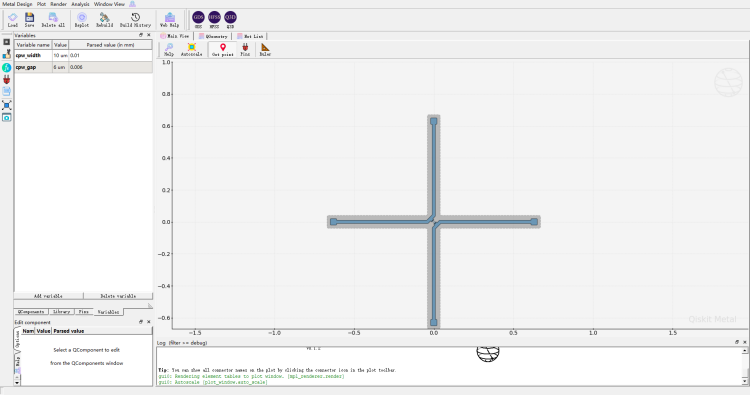

In [10]:
my_cap = New_Transomon_Cross_01(design,'my_cap')
gui.rebuild()
gui.autoscale()
gui.screenshot()
design.overwrite_enabled = True

In [69]:
r1 = MyReadoutRes01(design, 'Res01', )

# rebuild in gui
# gui.rebuild()
# gui.autoscale()

In [6]:
r2 = MyReadoutRes02(design, 'Res02', )
gui.rebuild()
gui.autoscale()

design.overwrite_enabled = True

In [39]:
r1_p = r1.parse_options()
left_length = r1_p.vertical_start_length+ r1_p. vertical_end_length \
                       + r1_p. horizontal_start_length01+ r1_p.horizontal_start_length02 + r1_p.horizontal_end_length + (5+2.5)*np.pi *r1_p.readout_cpw_turnradius
# r1.options.total_length
(r1_p.total_length-left_length)/5
r1_p

{'pos_x': 0.0,
 'pos_y': 0.0,
 'orientation': 0.0,
 'chip': 'main',
 'layer': 1.0,
 'readout_radius': 0.05,
 'readout_cpw_width': 0.005,
 'readout_cpw_gap': 0.005,
 'readout_cpw_turnradius': 0.05,
 'vertical_start_length': 0.04,
 'vertical_end_length': 0.2,
 'horizontal_start_length01': 0.4,
 'horizontal_start_length02': 0.4,
 'horizontal_end_length': 0.5,
 'total_length': 5.0,
 'arc_step': 0.001,
 'meander_round': 5.0,
 'layer_subtract': 2.0,
 'inverse': False,
 'mirror': False,
 'subtract': True,
 '_default_connection_pads': {}}

In [70]:
r1.options.total_length = '4 mm'
r1.options.readout_cpw_gap = '10 um'
gui.rebuild()
gui.autoscale()

In [27]:
my_cap.options.gds_cell_name = 'FakeJunction_01'
my_cap.options
# gui.rebuild()
# gui.autoscale()
# New_Transomon_Cross_01.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'FakeJunction_01'}

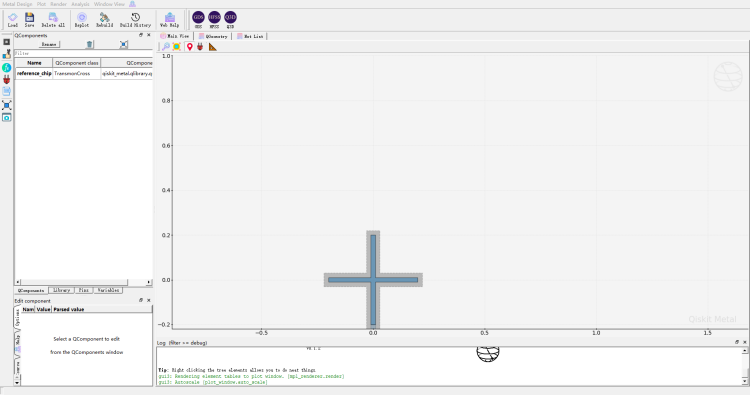

In [25]:
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
my_cap = TransmonCross(design,'reference_chip',options=Dict(gds_cell_name ='FakeJunction_01' ))
gui.rebuild()
gui.autoscale()
gui.screenshot()
design.overwrite_enabled = True

In [26]:
my_cap.options

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'FakeJunction_01'}

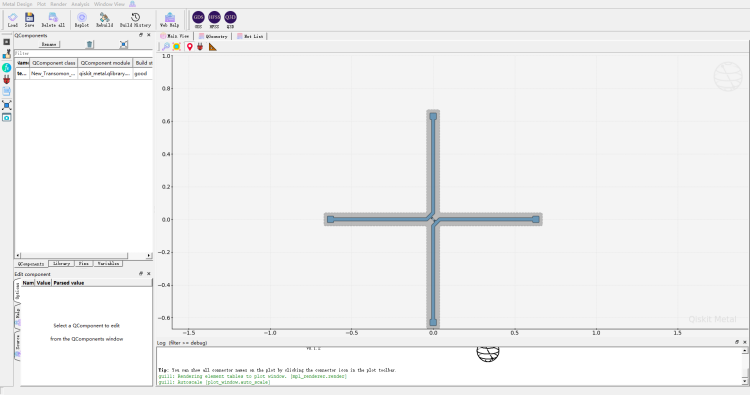

In [76]:
from  qiskit_metal.qlibrary.user_components.my_qcomponent import  New_Transomon_Cross
my_test = New_Transomon_Cross(design,'test_chip',options=Dict(gds_cell_name='FakeJunction_01'))
# my_test1 = MyQComponent(design,'test_chip1')
gui.rebuild()
gui.autoscale()
gui.screenshot()
design.overwrite_enabled = True

In [11]:
my_test.options

{'pos_x': '0um',
 'pos_y': '0um',
 'orientation': '0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 'cross_width': '1340um',
 'cross_height': '80um',
 'cross_inside_width': '20um',
 'pad_width': '40um',
 'pad_height': '40um',
 'pad_distance': '20um',
 'jj_pad_width': '10um',
 'jj_pad_height': '9um',
 'jj_etch_length': '4um',
 'jj_etch_pad1_width': '4um',
 'jj_etch_pad2_width': '7um',
 'round_corner_radius': '10um',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'FakeJunction_01'}

In [77]:
a_gds = design.renderers.gds
a_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [78]:
a_gds.options['short_segments_to_not_fillet'] = 'True'
scale_fillet = 2.0
a_gds.options['check_short_segments_by_scaling_fillet'] = scale_fillet
a_gds.export_to_gds('test.gds')

1